In [1]:
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import plot_precision_recall_curve

from yellowbrick.classifier import PrecisionRecallCurve

In [2]:
dataset_folder = pathlib.Path("../../../Datasets")
dataset_name = "kdd2004.csv"
dataset_path = dataset_folder/dataset_name

In [3]:
df = pd.read_csv(dataset_path)

# Remapping target classes
df["target"] = df["target"].map({-1:0, 1:1})

df.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,0
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,0
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,0
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,0
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,0


In [4]:
print(f"Dataset shape: {df.shape}\n")
print(f"Distribution of the target:\n{df['target'].value_counts(normalize=True)}")

Dataset shape: (145751, 75)

Distribution of the target:
0    0.991108
1    0.008892
Name: target, dtype: float64


In [5]:
# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=["target"], axis=1), df["target"], test_size=0.3)

X_train.shape, X_test.shape

((102025, 74), (43726, 74))

In [6]:
# Baseline prediction
y_train_baseline = pd.Series(np.zeros_like(y_train))
y_test_baseline = pd.Series(np.zeros_like(y_test))

In [7]:
# Training a random forest model
rf = RandomForestClassifier(n_estimators=100, max_depth=2)
rf.fit(X_train, y_train)

# Training a logistic regression model
logit = LogisticRegression(max_iter=1000)
logit.fit(X_train, y_train)

C:\Users\safou\anaconda3\envs\imbalanced_env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

## Precision-Recall curve

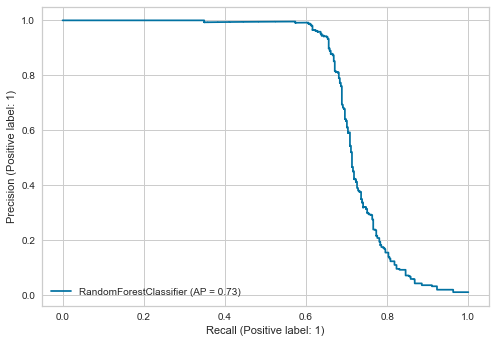

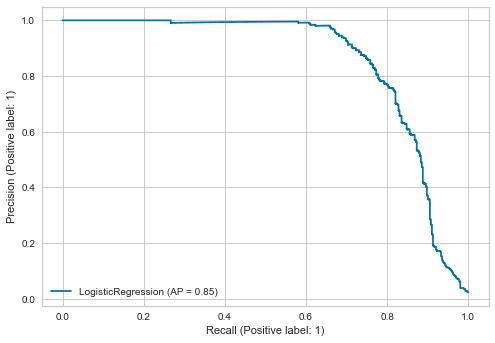

In [8]:
# Using scikit-learn
rf_disp = plot_precision_recall_curve(rf, X_test, y_test)
logit_disp = plot_precision_recall_curve(logit, X_test, y_test)

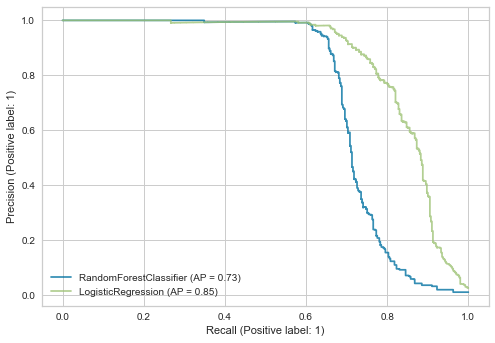

In [9]:
ax = plt.gca()
rf_disp.plot(ax=ax, alpha=0.8)
logit_disp.plot(ax=ax, alpha=0.8)

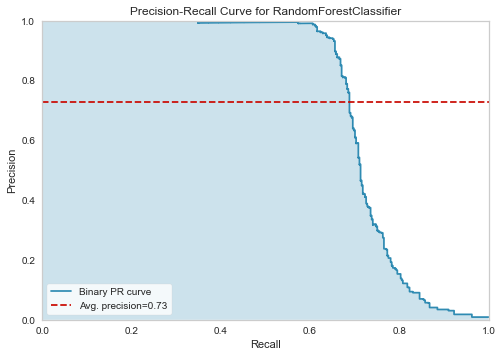

<AxesSubplot:title={'center':'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [10]:
# Using yellowbrick
visualizer = PrecisionRecallCurve(rf, classes=[0, 1], is_fitted=True)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()